# Klasifikace na základě vzdálenosti

Úloha zaměřená na implementaci vybraných klasifikačních algoritmů na základě vzdálenosti.


## K-NN (Metoda nejbližšího souseda)
K-NN je neparametrickou vzdálenostní metodou.

**Učení:**
* uložení všech $N$ trénovacích dat
* známe hodnoty dat a příslušnost každého vzorku k nějaké třídě

**Klasifikace do celkem $K$ tříd $c_0...c_k$ :**

* Pro klasifikovaný příznakový vektor $x$ je nalezen vzorek $(𝒙_𝑖, 𝑐_𝑖)$, který je mu nejblíže a na základě jeho příslušnosti k jedné ze tříd je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$

![image info](data/knn_image.png)


Zdroj: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn   

### Reprezentace tříd etalony (centroidy)
Etalon je představitelem třídy, který ji nejlépe reprezentuje ve smyslu vzdálenosti ke všem prvkům trénovací množiny.
Etalon je buď skutečným prvkem třídy, nebo může vzniknout výpočtem.
Pro **každou třídu** je etalon stanoven v průběhu učení systému.
    
#### Vzdálenostní klasifikace pomocí etalonů:
**Učení:**
* Pro každou třídu se určí její etalon (centroid)
* Je určen jako průměrný prvek

**Klasifikace do celkem $K$ tříd $c_0...c_k$ :**

* Pro klasifikovaný příznakový vektor $x$ je nalezen centroid $(𝒙_𝑖, 𝑐_𝑖)$, který je mu nejblíže, a na základě jeho příslušnosti k jedné ze tříd je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$
 
### Vzdálenostní funkce
#### Hammiltonová vzálenost (L1) 
$$ d(x,z) = \sum_{i=0}^{Dim}{|x_i - z_i|} $$

#### Euklidovská vzdálenost (L2)
$$ d(x,z) = \sqrt{\sum_{i=0}^{Dim}{(x_i - z_i)^2}} $$

Při implementaci jde vynechat operaci druhé odmocniny, protože druhá odmocnina je monotónní rostoucí funkce. To znamená, že se mění jenom absolutní hodnoty vzdálenosti, ale pořadí se zachovává:
$$ d(x,z) = \sum_{i=0}^{Dim}{(x_i - z_i)^2} $$


### Výpočet úspěšnosti
$$ accuracy = \frac{\text{počet správně klasifikovaných objektů}}{\text{počet všech klasifikovaných objektů}} $$


### Vektor příznaků
Klasifikovaný objekt lze reprezentovat jako vektor příznaků s rozměrem D.
Hodnoty vektoru budou odpovídat hodnotám jasu jednotlivých pixelů, kde $a$ je šířka obrázku a $b$ výška v pixelech.
Prostor příznaků – 2D příklad:
Objekty patřící do jednotlivých tříd mají podobné hodnoty příznaků.
Vytváří v prostoru příznaků shluky (jsou blízko sebe)


## Dvě třídy

In [3]:
import numpy as np
import usu


In [4]:
npzfile = np.load('data/data_04.npz')
npzfile.files


['testData', 'testRef', 'trainData', 'trainRef']

In [5]:
testData = npzfile['testData'] # body, 1 radek je 1 bod se souradnici[x,y]
testRef = npzfile['testRef']# tridy 0 a 1

trainData = npzfile['trainData']
trainRef = npzfile['trainRef']


In [6]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape


((1900, 2), (1900, 1), (100, 2), (100, 1))

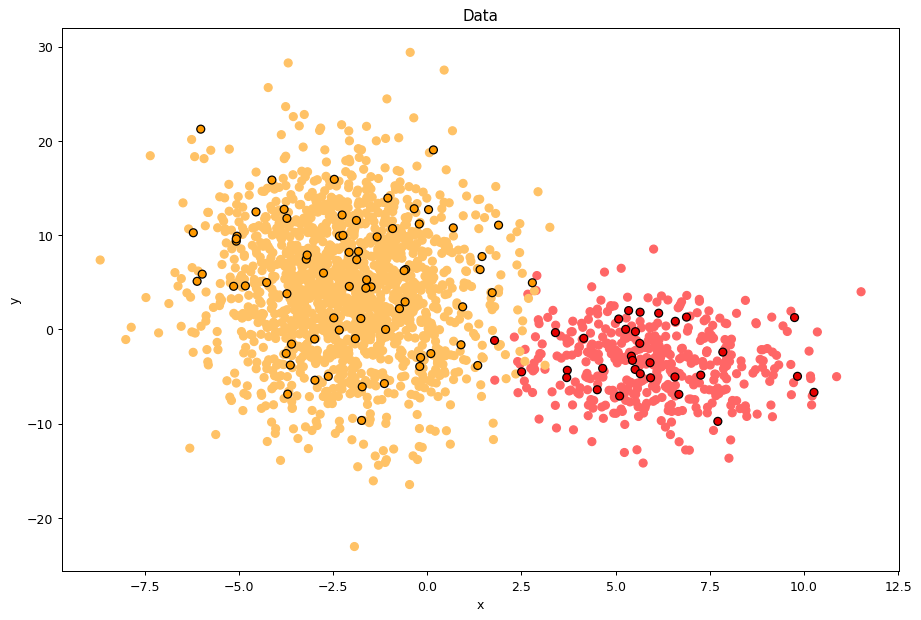

In [7]:
usu.draw2d(trainData, trainRef, testData, testRef )


In [28]:
class KNN:
    
   
    def __init__ (self, k=1, distance='l1'):
        """
        k - pocet sousedu
        distance: l1(hammiltonova) nebo l2(euklidovska)
        """
        self.k = k
        self.distance = distance
        
        self.train_data = None
        self.train_targets = None
    
        
    def train(self, train_data, train_targets, etalons=False):
        """
            
        """
        #################################################################
        # ZDE DOPLNIT
        
        if(etalons):          
            
            #do proměnné self.train_data uložte etalony a nastavte jim odpovídající třídu do self.train_targets
            
            self.train_data = ...
            self.train_targets = ...

        else:    
            self.train_data = train_data # matice priznaku
            self.train_targets = train_targets # vektor trid
            
        #################################################################
        
    def classification(self, test_data, test_targets):        
       
        
        #################################################################
        # ZDE DOPLNIT        
        
        ...
        
        return accuracy
        #################################################################

NameError: name 'self' is not defined

### Implementace bez použití etalonů

In [27]:
print("metrika l1:")
for k in range(1,10): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:
 k = 1, accuracy: 96.67 %
 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 96.67 %
 k = 4, accuracy: 96.67 %
 k = 5, accuracy: 96.67 %
 k = 6, accuracy: 96.67 %
 k = 7, accuracy: 94.44 %
 k = 8, accuracy: 96.67 %
 k = 9, accuracy: 96.67 %


In [10]:
print("\nmetrika l2:")
for k in range(1,10): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:
 k = 1, accuracy: 97.00 %
 k = 2, accuracy: 98.00 %
 k = 3, accuracy: 98.00 %
 k = 4, accuracy: 98.00 %
 k = 5, accuracy: 99.00 %
 k = 6, accuracy: 99.00 %
 k = 7, accuracy: 99.00 %
 k = 8, accuracy: 99.00 %
 k = 9, accuracy: 99.00 %


### Reprezentace tříd etalony (centroidy)

In [11]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)
print(knn.train_data.shape, trainData.shape, type(knn.train_data), type(trainData)) #zkontrolujeme jestli velikosti a typ jsou stejny

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")

(2, 2) (1900, 2) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
acc with l1, k = 1 is 92.00 %
acc with l2, k = 1 is 89.00 %


## Tři třídy

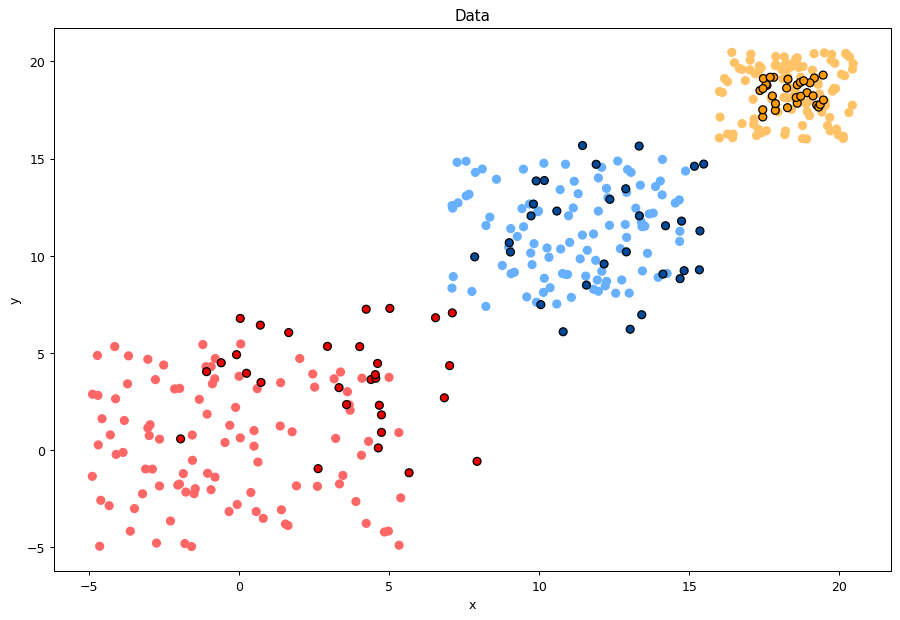

In [13]:
npzfile = np.load('data/data_04_3cl.npz')

testData = npzfile['testData']
testRef = npzfile['testRef']
trainData = npzfile['trainData']
trainRef = npzfile['trainRef']

usu.draw2d(trainData, trainRef, testData, testRef)


### Implementace bez použití etalonů

In [14]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape

((300, 2), (300, 1), (90, 2), (90, 1))

In [15]:
print("metrika l1:")
for k in range(1,5): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:
 k = 1, accuracy: 96.67 %
 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 96.67 %
 k = 4, accuracy: 96.67 %


In [16]:
print("\nmetrika l2:")
for k in range(1,5): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:
 k = 1, accuracy: 95.56 %
 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 95.56 %
 k = 4, accuracy: 96.67 %


### Reprezentace tříd etalony (centroidy)

In [17]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")


acc with l1, k = 1 is 92.22 %
acc with l2, k = 1 is 92.22 %


### Závěr:
 1. Rozhodněte, kdy je vhodnější použít který algoritmus.
 2. Určete složitost algoritmů.

In [ ]:
# 1. ...
# 2. ...